
# Simple orders analysis

We are finally ready to start analysing our order dataset!

Our objectif is to get an initial understanding of
- Orders properties
- Their associated `review_scores`

In [ ]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import your newly coded order training set
from olist.order import Order
orders = Order().get_training_data()

## 1 - Inspect features

❓ Print summary statistics `DataFrame.describe()` of each columns of the order dataset, and in particular `wait_time`

Plot various histograms to get a sense of each variable distribution.
In particular, create a `sns.FacetGrid()` of histograms for each `review_score`

What do you notice for variables `price` and `freight_value` ? Analyse also `distance_seller_customer` if you have created it in `order.py`

In [13]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,97013.000000,99222.000000,97013.000000,99222.000000,99222.000000,99222.000000,99222.000000,99222.000000,99222.000000,99222.000000
mean,12.565056,23.782172,0.774505,0.577977,0.113916,4.089325,1.142106,1.013686,137.602397,22.818860
std,9.542731,8.832022,4.747844,0.493885,0.317711,1.343906,0.539584,0.122520,210.280365,21.623546
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.771389,18.344899,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.850000
50%,10.225625,23.248050,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.800000,17.170000
75%,15.732685,28.433507,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.050000
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


<AxesSubplot:ylabel='Frequency'>

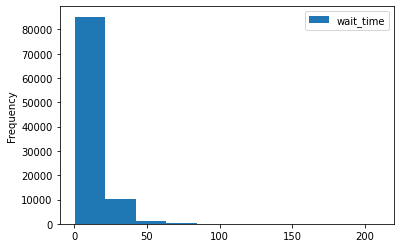

In [14]:
orders[["wait_time"]].plot(kind = 'hist')

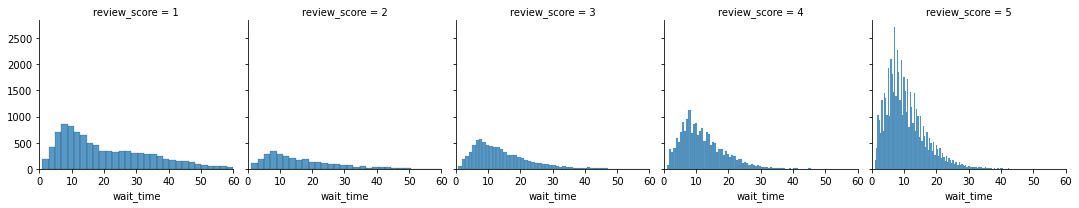

In [25]:
g = sns.FacetGrid(orders, col="review_score") # create grid
g.map(sns.histplot, "wait_time")
g.set(xlim=(0, 60))# plot in each grid element

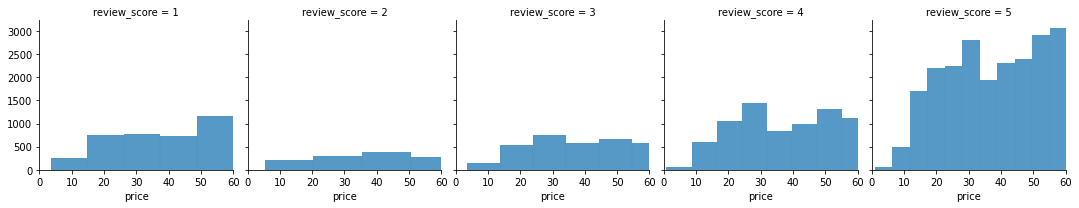

In [20]:
g = sns.FacetGrid(orders, col="review_score") # create grid
g.map(sns.histplot, "price") # plot in each grid element
g.set(xlim=(0, 60))

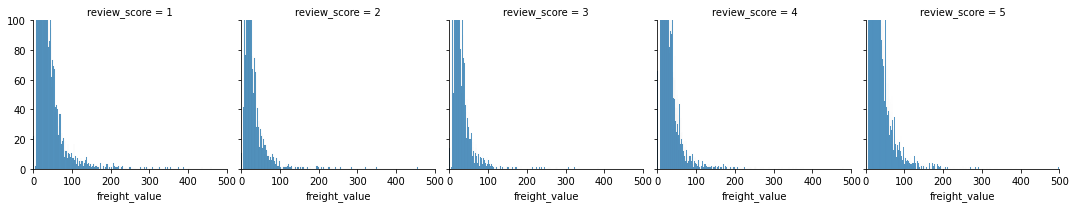

In [29]:
g = sns.FacetGrid(orders, col="review_score") # create grid
g.map(sns.histplot, "freight_value") # plot in each grid element
g.set(xlim=(0, 500), ylim=(0, 100))

----
❓Inspect the various correlations between features: which one seems most correlated with `review_score`?

<details>
    <summary>Hint</summary>

`DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
</details>

<AxesSubplot:>

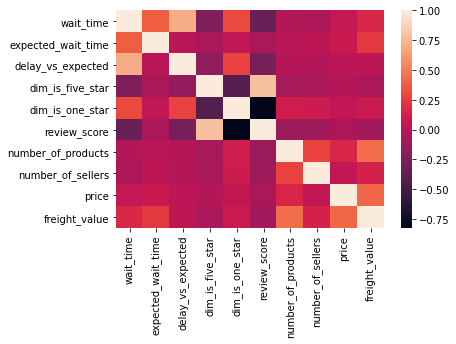

In [23]:
orders.corr()
sns.heatmap(orders.corr())

## 2 - Simple regression of `review_score` against delivery duration

It seems that `review_score` is mostly correlated with `wait_time` (r = 33%) and `delay_vs_expected` (r=27%).
Let's investigate these with seaborn

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively

- Reduce your dataframe to a random subsample of 10,000 row for speed purpose (a good practice in data exploration)
- use `DataFrame.sample()` with a fixed `random_state` to avoid changing sample at each execution if needed
- Use `sns.regplot()` to plot the regression line
- Add some `y_jitter` parameters to better visualize scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [33]:
sample = orders.sample(10000, random_state = 1)
sample.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,9791.000000,10000.000000,9791.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.698424,23.894717,0.817448,0.578200,0.118400,4.076600,1.138400,1.014100,135.381124,22.712075
std,9.639565,9.057603,4.784781,0.493872,0.323097,1.359455,0.532047,0.122077,198.256954,19.718451
min,0.533414,2.024074,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.850000,0.000000
25%,6.859844,18.309444,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,14.007500
50%,10.256898,23.330440,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,85.990000,17.450000
75%,15.830237,28.490888,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.310000
max,194.633611,155.135463,166.583380,1.000000,1.000000,5.000000,15.000000,3.000000,3930.000000,458.730000


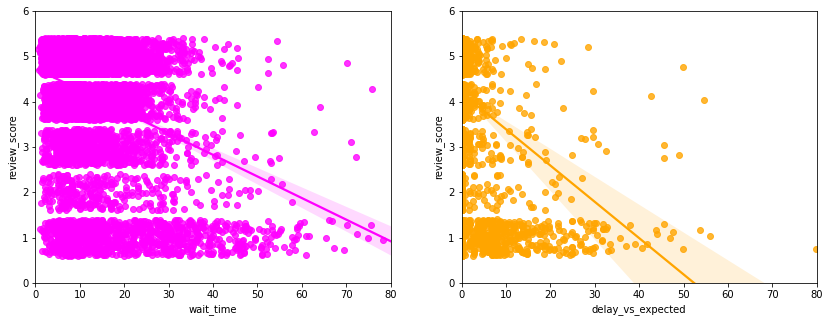

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
sns.regplot(x = "wait_time", y = "review_score", data = sample, ax = ax1, y_jitter=.4, color = 'magenta');
ax1.set(xlim=(0, 80), ylim=(0, 6));
sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, ax = ax2, y_jitter=.4, color = 'orange');
ax2.set(xlim=(0, 80), ylim=(0,6));

### 2.2 Interpretation

❓Try to visually 'compute' the `slope` of each curve. Write down, in plain english, how would you interpret these coefficients if you were to explain it to a non-datascientist

Both have a negative slope indicating a negative correlation between wait_time, delay_vs_expected and the review_score given by the customer. The slope is steeper or delay_vs_expected indicated a stronger correlatio compared to wait_time. 

<details>
    <summary>Answer</summary>


- Slope wait_time = -0.05 : "For each additional day an order takes to deliver, the review_score on average is reduced by 0.05"
- Slope delay = -0.1 : "For each additional day _above expected_ an order takes to deliver, the review_score on average is reduced by 0.1"

Try to convince yourself intuitively why the latter is the most impactful than the former!

### 2.3 Inferential analysis

These slope coefficients have been computed only for a limited number of orders: 100,000 for the whole dataset, representing only 16 months of data.

**How certain** are we that these coefficients are **statistically significant**? i.e that they do not capture random fluctuations due to the limited observation perdiod, and would not generalize well to future orders (all else being equal)?

We need to estimate **confidence interval** around the mean value for these slope  
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

Fortunately, seaborn already computes this 95% confidence interval for us the shaded blue cone around regression line!

❓Use seaborn `regplot` to visualize the two confidence intervals:
- Change the size of the sample by sub-sampling your dataset: Notice how the slope may change as sample size become smaller. What about the confidence interval?
- Change the size of the confidence interval by playing with regplot `ci` parameter (95% by default)

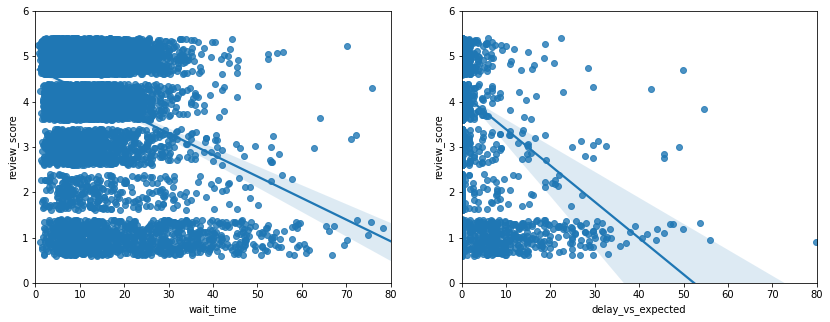

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
sns.regplot(x = "wait_time", y = "review_score", data = sample, ax = ax1, y_jitter=.4, ci = 99);
ax1.set(xlim=(0, 80), ylim=(0, 6));
sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, ax = ax2, y_jitter=.4, ci = 99);
ax2.set(xlim=(0, 80), ylim=(0,6));

<details>
    <summary>🔎 Interpretation</summary>

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contains the value 0.
- We are 95% confident that slower deliveries are associated with weaker reviews.
- The `p-value` associated with the null-hypothesis "review_score are not related with delivery duration" is close to 0, and we could safely reject this hypothesis

$\implies$ Our findings are said to be **statistically significant**. 

However, **correlation does not implies causality**. It may well be that some products, which happen to be inherently slow to deliver on average (heavy ones maybe?), also happen to have consistent low review_score, whatever time it takes to be delivered. Identifying these **confounding factor** is crucial and cannot be done with simple univariate regression. We will see tomorrow the power of multivariate linear regression for that matter. 
</details>



🏁 Congratulation! Don't forget to commit and push your notebook